In [12]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [13]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

sepal_length = np.array(features[:, 0])
petal_width = np.array(features[:, 3])

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

Text(0, 0.5, 'Petal Width')

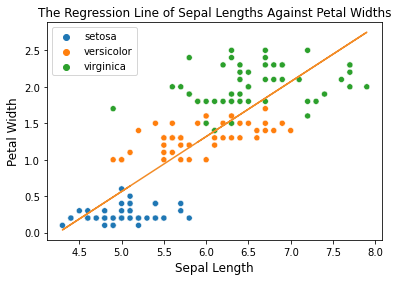

In [14]:
reg = LinearRegression().fit(X = sepal_length.reshape(-1,1), y = petal_width.reshape(-1,1))

sns.scatterplot(x = sepal_length, y = petal_width, hue = species_names)

plt.plot(
    sepal_length, 
    reg.intercept_[0] + reg.coef_[0][0] * features[:, 0], 
    color = '#f28c28'
)

plt.title("The Regression Line of Sepal Lengths Against Petal Widths")
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)

In [15]:
print(reg.intercept_, reg.coef_)

[-3.200215] [[0.75291757]]


From the result above, it tells us two things:
* The intercept starts at $-3.200215$
* The first coefficient is $0.75291757$

So in this case, our regression formula is $y = -3.200215 + 0.75291757 \cdot x_i$.

In [16]:
lr_predictions = reg.predict(sepal_length.reshape(-1,1))
lr_mse = mean_squared_error(lr_predictions, petal_width)
print(f"Linear Regression's MSE is {lr_mse}")

Linear Regression's MSE is 0.19101500769427363


With $y = -3.200215 + 0.75291757 \cdot x_i$, the Mean Squared error is $0.1910150076942736$.

# 1. Gradient Descent

In [17]:
def predict(intercept, coefficient, dataset):
    return np.array([intercept + coefficient * x for x in dataset])

def gd(x, y, epochs, df, alpha = 0.01):
    intercept = 1.0
    coefficient = -7.5
    predictions = predict(intercept, coefficient, x)
    sum_error = np.sum((predictions - y) ** 2) / (2 * len(x))
    df.loc[0] = [intercept, coefficient, sum_error]
    for epoch in range(1, epochs):
        predictions = predict(intercept, coefficient, x)
        b0_error = (1/len(x)) * np.sum(predictions - y)
        b1_error = (1/len(x)) * np.sum((predictions - y) * x)
        intercept = intercept - alpha * b0_error
        coefficient = coefficient - alpha * b1_error 
        sum_error = np.sum((predictions - y) ** 2) / (2 * len(x))
        df.loc[epoch] = [intercept, coefficient, sum_error]
    return df

Let's train, or update the weight of our parameters, for 10,000 times.

In [18]:
gd_loss = pd.DataFrame(columns=['intercept', 'coefficient', 'sum_error'])
gd_loss = gd(sepal_length, petal_width, epochs = 10000, df = gd_loss)

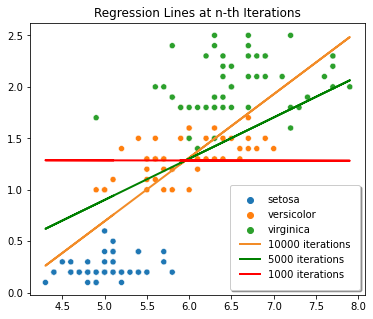

In [19]:
plt.figure(figsize=(6,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][9999] + gd_loss['coefficient'][9999] * sepal_length,
    '#f28c28',
    linewidth = 2,
    label = '10000 iterations'
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][4999] + gd_loss['coefficient'][4999] * sepal_length,
    '-g',
    linewidth = 2,
    label = '5000 iterations'
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][999] + gd_loss['coefficient'][999] * sepal_length,
    '-r',
    linewidth = 2,
    label = '1000 iterations'
)

plt.title("Regression Lines at n-th Iterations")

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

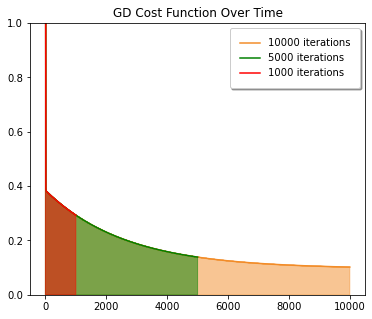

In [20]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(0, 10000), gd_loss['sum_error'][:10000], color = '#f28c28', label = '10000 iterations')
plt.fill_between(np.arange(0, 10000), gd_loss['sum_error'][:10000], step="pre", alpha = 0.5, color = '#f28c28')

plt.plot(np.arange(0, 5000), gd_loss['sum_error'][:5000], color = 'green', label = '5000 iterations')
plt.fill_between(np.arange(0, 5000), gd_loss['sum_error'][:5000], step="pre", alpha = 0.5, color = 'green')

plt.plot(np.arange(0, 1000), gd_loss['sum_error'][:1000], color = 'red', label = '1000 iterations')
plt.fill_between(np.arange(0, 1000), gd_loss['sum_error'][:1000], step="pre", alpha = 0.5, color = 'red')

plt.title(f'GD Cost Function Over Time')
plt.ylim(0.0, 1.0)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

(4.2, 8.0)

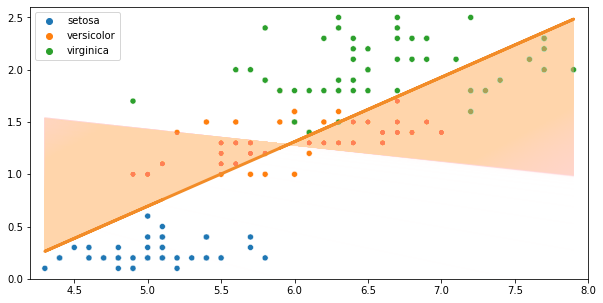

In [21]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

for i in range(0, 9999):
    plt.plot(
        sepal_length, 
        gd_loss['intercept'].loc[i] + gd_loss['coefficient'].loc[i] * sepal_length,
        color = '#ffd5ab',
        linestyle = '-',
        lw = 1,
        alpha = 0.01
    )

plt.plot(
    sepal_length, 
    gd_loss['intercept'].loc[9999] + gd_loss['coefficient'].loc[9999] * sepal_length,
    color = '#f28c28',
    lw = 3,
    linestyle = '-'
)

plt.ylim(0, max(petal_width) + 0.1)
plt.xlim(min(sepal_length) - 0.1, max(sepal_length) + 0.1)

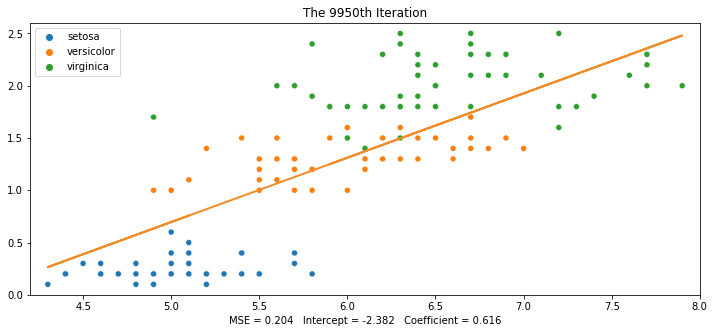

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
plt.xlim(min(sepal_length) - 0.1, max(sepal_length) + 0.1)
plt.ylim(0, max(petal_width) + 0.1)

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

line, = ax.plot(
    sepal_length, 
    gd_loss['intercept'][0] + gd_loss['coefficient'][0] * sepal_length,
    color="#f28c28", 
    linestyle='-',
    linewidth = 2, 
    label = 'regression line'
)

def update(frame_num):
    regline = gd_loss['intercept'].loc[frame_num] + gd_loss['coefficient'].loc[frame_num] * sepal_length
    line.set_ydata(regline)
    plt.title(f"The {frame_num}th Iteration")
    plt.xlabel(f"MSE = {mean_squared_error(regline, petal_width):.3f}   Intercept = {gd_loss['intercept'].loc[frame_num]:.3f}   Coefficient = {gd_loss['coefficient'].loc[frame_num]:.3f}")
    return line, ax

anim = FuncAnimation(fig, update, repeat = True, frames=np.arange(0, 10000, 50), interval=10)
anim.save(
    './bgd.gif', 
    writer = PillowWriter(fps=60), 
    dpi = 150
)
plt.show()

In [23]:
intercepts = np.linspace(-10, 10, 50)
coefficients = np.linspace(-10, 10, 50)
x, y = np.meshgrid(intercepts, coefficients)
z = np.zeros(x.shape)

# calculate the mean squared error for each point on the surface
z = np.array([[mean_squared_error(
    predict(x_i, y_i, sepal_length),
    petal_width
) for x_i in intercepts] for y_i in coefficients])

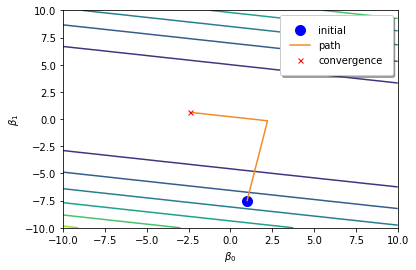

In [24]:
plt.contour(x, y, z)
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.plot(
    gd_loss['intercept'][0], 
    gd_loss['coefficient'][0], 
    'o',
    markersize=10, 
    color='blue',
    label="initial"
)

plt.plot(
    gd_loss['intercept'][0:len(gd_loss)-2], 
    gd_loss['coefficient'][0:len(gd_loss)-2], 
    color='#f28c28',
    label='path'
)

plt.plot(
    gd_loss['intercept'][len(gd_loss)-1], 
    gd_loss['coefficient'][len(gd_loss)-1], 
    'x',
    markersize=5, 
    color='red',
    label="convergence"
)

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)